<a href="https://colab.research.google.com/github/alyasaharani/A2_037_ALYA-SAHARANI_POSTTEST2-DATMIN/blob/main/A2_037_Alya_Saharani_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

In [123]:
#Import Data
import pandas as pd
import seaborn as sns

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [124]:
# Untuk memasukkan dan membaca dataset_market_basket - sheet 1
df1 = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Sheet1")

In [125]:
# Melihat Data Tabular item
df1

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls,frankfurter,whipped,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
# Menghitung keseluruhan item pada data yang ada
df1.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls                  4
frankfurter            2
whipped                1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film             1
dtype: int64

In [127]:
# Untuk menampilkan tiap item sehingga dapat diketahui itemnya ada apa saja
print("List Item :\n")
for col in df1.columns:
  print(col)

List Item :

whole milk
pastry
salty snack
sausage
semi-finished bread
yogurt
soda
pickled vegetables
canned beer
misc. beverages
hygiene articles
rolls
frankfurter
whipped
curd
beef
white bread
butter
frozen vegetables
other vegetables
tropical fruit
sugar
butter milk
specialty chocolate
frozen meals
dental care
root vegetables
detergent
dish cleaner
cling film


####Menentukan kombinasi item yang mungkin terjadi

In [128]:
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df1.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('pastry', 'sausage'),


In [129]:
# Menyimpan data dalam bentuk list
rule_baru = []
for rule in rules: #Mengulangi pembacaan dataset
  if len(df1[(df1[rule[0]]==1) & (df1[rule[1]]==1)]) >0: #Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru #Menampilkan hasil

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls', 'whole milk'),
 ('rolls', 'sausage'),
 ('frankfur

In [130]:
#Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
hitung = {}
for rule in rule_baru:
  banyak_data= len(df1[
      (df1[rule[0]]==1) & (df1[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data
hitung #Menampilkan hasil

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('canned beer', 'misc. bev

In [131]:
# Melihat banyak transaksi
len(df1)

19

####Menghitung Support

In [132]:
print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df1)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls') support = 10.526315789473683%
('semi-finished bread', 'whole milk') sup

####Menghitung Confidence

In [133]:
print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df1[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole milk 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

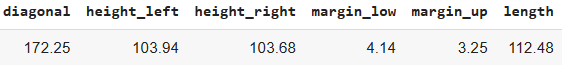
<!-- 1412 -->

In [134]:
# Mengimpor dan memasukkan dataset
df = pd.read_csv('deteksi_uang_palsu.csv')

In [135]:
# Menampilkan dataframe dalam bentuk tabel
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


####Membuat Tabel Jarak

In [136]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


####Menambahkan Kolom Jarak

In [137]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

####Mengurutkan Data Terkecil ke Terbesar

In [138]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


####Menentukan Hasil Prediksi Berdasarkan Label Terbanyak

In [139]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Alya Saharani

> Nim : 2109116037

> Judul : Big Mart Sales

> Tema : Ritel



Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding

Business understanding pada bidang retail merujuk pada pemahaman mengenai industri ritel atau penjualan, termasuk bagaimana strategi dalam berbisnis. Adapun strategi bisnis dibidang ritel adalah kegiatan jual beli yang ditujukan untuk menyalurkan barang kepada konsumen akhir dalam rangka memenuhi kebutuhan konsumen baik melalui toko fisik maupun toko online.

Big Mart adalah swalayan yang memiliki beberapa cabang di berbagai kota dan telah berhasil melakukan penjualan untuk ribuan produk di tahun 2013. Jadi, Big Mart akan mencoba memahami sifat-sifat produk dan gerai yang berperan penting dalam meningkatkan penjualan.

Sehingga tujuan digunakannya data mining pada kasus ini yaitu untuk membangun model prediktif dan memprediksi penjualan setiap produk di outlet tertentu.


## Dataset
https://www.kaggle.com/datasets/aakashverma8900/portuguese-bank-marketing

In [140]:
# Membaca dan melakukan import library
import pandas as pd 
import seaborn as sns
import plotly.express as px
import numpy as np

## Data Understanding

### Collect Data

In [141]:
# Memasukkan dataset
df2 = pd.read_csv('Train-Set.csv')

### Describe Data

Dataset yang digunakan memiliki 8523 baris data pada Big Mart Sales Prediction, yang tersusun dalam 12 kolom.

In [142]:
# Menampilkan dataframe dalam bentuk tabel
df2

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [143]:
#Menampilkan daftar kolom pada dataset
print("Daftar kolom yang ada pada dataframe :")
for col in df2.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
ProductID
Weight
FatContent
ProductVisibility
ProductType
MRP
OutletID
EstablishmentYear
OutletSize
LocationType
OutletType
OutletSales


#### Penjelasan Perkolom : 


1.   ProductID : ID produk yang unik.
2.   Weight : Berat produk.
3.   FatContent : Menentukan apakah produk rendah lemak atau tidak.
4.   ProductVisibility : Persentase total area tampilan semua produk di toko yang dialokasikan untuk produk tertentu.
5.   ProductType : Kategori yang dimiliki produk tersebut.
6.   MRP : Harga Eceran Maksimum (harga yang tercantum) dari produk.
7.   OutletID : ID toko yang unik.
8.   EstablishmentYear : Tahun pendirian outlet.
9.   OutletSize : Ukuran toko dalam hal luas tanah tertutup.
10.   LocationType : Jenis kota tempat toko berada.
11.   OutletType : Menentukan apakah outlet hanya toko kelontong atau semacam supermarket.
12.   OutletSales : (variabel target) Penjualan produk di toko tertentu.




### Eksplore Data

In [144]:
#Melihat informasi umum dari dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [145]:
#Melihat ringkasan statistik kerangka data
df2.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
# Melihat jumlah nilai yang hilang di setiap kolom
(df2.isnull().sum())

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [147]:
# Melihat matriks korelasi kerangka data
(df2.corr())

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
ProductVisibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
EstablishmentYear,-0.011588,-0.074834,0.005020,1.000000,-0.049135
OutletSales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### VISUALISASI COMPARISON

<Axes: xlabel='LocationType', ylabel='count'>

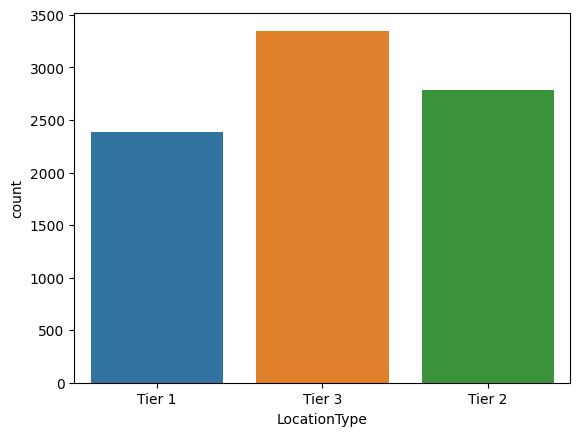

In [148]:
#menampilkan berapa banyak berdasarkan kategori retail yang memiliki category Furniture,Office Supplies Category,Technology
sns.countplot(data=df2,x="LocationType") 

<Axes: xlabel='EstablishmentYear', ylabel='count'>

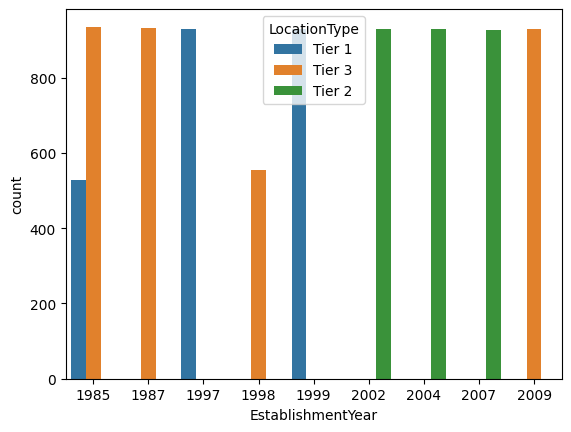

In [149]:
#visualisasi yang menampilkan berapa banyak Country berdasarkan Quantity nya
sns.countplot(data=df2, x="EstablishmentYear", hue="LocationType")

Penjelasan pada tiap visualisasi comparison :

*   Pada visualisasi pertama yaitu membuat visualisasi perbandingan yang menampilkan berapa banyak Tier 1, Tier 2, dan Tier 3 pada LocationType.
*   Pada visualisasi kedua yaitu membuat visualisasi perbandingan yang menampilkan berapa banyak jumlah EstablishmentYear berdasarkan LocationType-nya, yang dimana pada LocationType sendiri berisi Tier 1, Tier 2, dan Tier 3.

### VISUALISASI DISTRIBUTION

<Axes: xlabel='EstablishmentYear', ylabel='Count'>

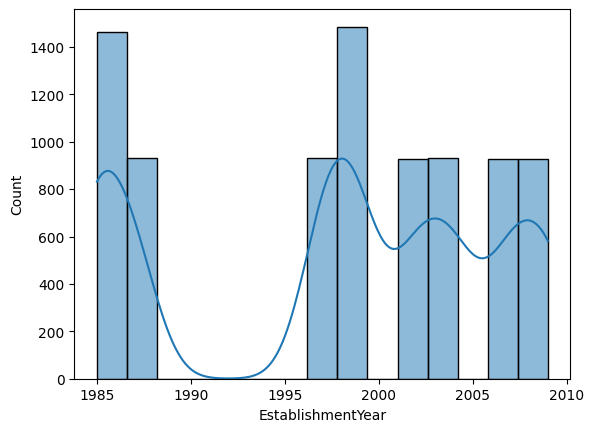

In [150]:
#Menampilkan histogram untuk EstablishmentYear
sns.histplot(data=df2,x="EstablishmentYear",kde=True)

<Axes: xlabel='EstablishmentYear'>

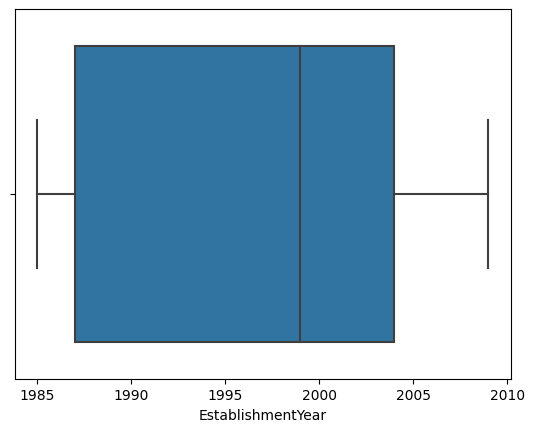

In [151]:
#Menampilkan boxplot untuk EstablishmentYear 
sns.boxplot(data=df2, x="EstablishmentYear")

Penjelasan pada tiap visualisasi distribution :

*   Pada visualisasi pertama yaitu membuat visualisasi histogram untuk tahun didirikannya outlet (EstablishmentYear) dan di tambahkan "kde=True" agar pada histogram terdapat garis lengkungan yang menyesuaikan diagram batang pada histogram.
*   Pada visualisasi kedua yaitu membuat visualisasi boxplot untuk tahun didirikannya outlet (EstablishmentYear), boxplot merupakan salah satu visualisasi dalam statistik deskriptif untuk menggambarkan secara grafik dari data numerik juga dapat digunakan untuk menilai kesimetrisan sebaran data.

### VISUALISASI RELATIONSHIP

<Axes: xlabel='EstablishmentYear', ylabel='LocationType'>

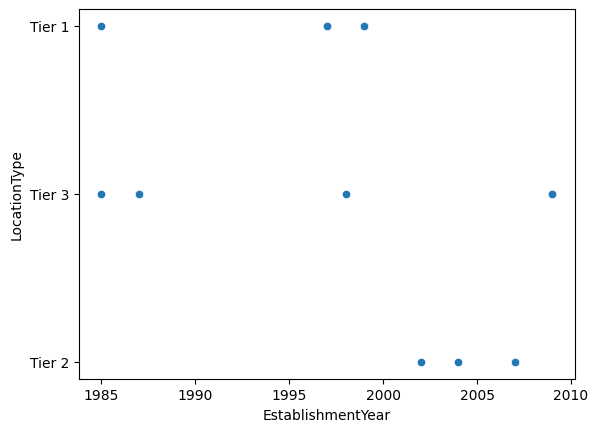

In [152]:
#Menampilkan scatterplot untuk EstablishmentYear dan LocationType
sns.scatterplot(data=df2, x="EstablishmentYear", y="LocationType")

In [153]:
# Menampilkan pieplot untuk OutletType
px.pie(df2,names="OutletType")

## Verify Data Quality

Validitas Data

Dapat dikatakan bahwa data-data yang di atas adalah valid, karena berdasarkan sumber datanya, data tersebut didapatkan dari para ilmuwan data di Big Mart yang telah mengumpulkan data penjualan tahun 2013 untuk 1559 produk di 10 toko di berbagai kota.

Duplikasi Data

In [154]:
is_duplicated = df2.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Berdasarkan output di atas (duplikasi data), dapat dikatakan bahwa data-data yang ada tidak memiliki duplikasi data.

# Data Preparation

### Select Data

In [155]:
# Memasukkan dataset
df2 = pd.read_csv('Train-Set.csv')

### Clean Data

In [156]:
#Mengetahui apakah ada nilai yang kosong
df2.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [157]:
import numpy as np
import pandas as pd

# Mengganti nilai missing values dengan mean/median dan mode
df2['Weight'] = df2['Weight'].fillna(df2['Weight'].mean())
df2['OutletSize'] = df2['OutletSize'].fillna(df2['OutletSize'].mode()[0])

Mengganti data yang hilang dengan nilai mean/median hanya dapat dilakukan pada data numerik sedangkan mengganti data yang hilang dengan nilai mode dapat dilakukan dengan data numerik dan kategorikal.
Karena data pada Weight bernilai nimerik maka disini saya menggunakan mean (rata-rata), dan karena data pada OutletSize bernilai kategorikal maka disini saya menggunakan mode.

In [158]:
#Memanggil agar mengetahui apakah masih ada nilai yang kosong
df2.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [159]:
#Menampilkan kembali dataframe dalam bentuk tabel dan terlihat sudah tidak ada lagi data yang bernilai kosong
df2

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Transform Data

In [160]:
df2 = pd.get_dummies(df2)
print(df2)

      Weight  ProductVisibility       MRP  EstablishmentYear  OutletSales  ProductID_DRA12  ProductID_DRA24  ProductID_DRA59  ProductID_DRB01  ProductID_DRB13  ProductID_DRB24  ProductID_DRB25  \
0      9.300           0.016047  249.8092               1999    3735.1380                0                0                0                0                0                0                0   
1      5.920           0.019278   48.2692               2009     443.4228                0                0                0                0                0                0                0   
2     17.500           0.016760  141.6180               1999    2097.2700                0                0                0                0                0                0                0   
3     19.200           0.000000  182.0950               1998     732.3800                0                0                0                0                0                0                0   
4      8.930        

Dapat dilihat bahwa tidak ada perbedaan antara output transform data dengan output select data, hal ini disebabkan oleh value atau nilai pada dataframe bertipe numerik, sehingga saat dilakukan transform data ke tipe numerik, data tidak ada yang berubah sehingga dapat dinyatakan bahwa output diatas menandakan bahwa dataset telah selesai di-transform.

###Split Data

In [161]:
from sklearn.model_selection import train_test_split
x = df2.drop('OutletSales',axis=1)
y = df2['OutletSales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

         Weight  ProductVisibility       MRP  EstablishmentYear  ProductID_DRA12  ProductID_DRA24  ProductID_DRA59  ProductID_DRB01  ProductID_DRB13  ProductID_DRB24  ProductID_DRB25  \
1921   7.720000           0.147904  116.6466               1998                0                0                0                0                0                0                0   
655   19.750000           0.014301  103.0332               1997                0                0                0                0                0                0                0   
2229  12.857645           0.054221  129.1310               1985                0                0                0                0                0                0                0   
2537  19.350000           0.118342  222.6088               2002                0                0                0                0                0                0                0   
3528  18.350000           0.092150  184.8266               1987       

#Kesimpulan

Berdasarkan penyelesaian struktur CRISP-DM (Cross-Industry Standard Process for Data Mining) pada dataset Train-Set bertema Retail (data penjualan) mulai dari tahap Business Understanding hingga Data Preparation, diperoleh kesimpulan bahwa data yang digunakan adalah data berkategori Supervised. Supervised adalah kondisi dimana data sudah memiliki label dan akan dimasukkan/dikelompokkan berdasarkan label tersebut, juga algoritma yang terdapat pada supervised bertujuan untuk memperkirakan atau memprediksi fungsi pada field pemetaan sehingga ketika ada variabel input (X) kita dapat memprediksi variabel output (Y).